# Estimating the Demand 

### Given the values of 5 weeks of data we have to predict the sixth and the seventh week demand.
### Demand = num_units_sold_in_week - num_units_returned 

### We will only the have the following columns in the the test Set: experiment_week, channel_type, store_identifier, product_identifier, category_of_route, supplier_identifier


In [3]:
#Importing the Basic Libraries Required
import pandas as pd 
import numpy as np 


In [155]:
#Reading the CSV
train = pd.read_csv("train.csv")

In [5]:
train.shape

(53364883, 10)

In [6]:
#columns
train.dtypes

experiment_week                 object
channel_type                    object
num_units_sold_in_week           int64
sales_revenue_in_week          float64
num_units_returned               int64
returned_units_revenue_loss    float64
store_identifier                object
product_identifier              object
category_of_route               object
supplier_identifier             object
dtype: object

In [7]:
train.head()

,experiment_week,channel_type,num_units_sold_in_week,sales_revenue_in_week,num_units_returned,returned_units_revenue_loss,store_identifier,product_identifier,category_of_route,supplier_identifier
0,Week 1 of 2019,Warehouse Retailers,3,377.1,0,0.0,store_fc6aa,product_cbfad,route_67047,supplier_identifier_055f7
1,Week 1 of 2019,Warehouse Retailers,4,502.8,0,0.0,store_fc6aa,product_2b363,route_67047,supplier_identifier_055f7
2,Week 1 of 2019,Warehouse Retailers,4,589.8,0,0.0,store_fc6aa,product_8de14,route_67047,supplier_identifier_055f7
3,Week 1 of 2019,Warehouse Retailers,4,502.8,0,0.0,store_fc6aa,product_1c00e,route_67047,supplier_identifier_055f7
4,Week 1 of 2019,Warehouse Retailers,3,343.8,0,0.0,store_fc6aa,product_55001,route_67047,supplier_identifier_055f7


In [157]:
train.describe(include="all")

,experiment_week,channel_type,num_units_sold_in_week,sales_revenue_in_week,num_units_returned,returned_units_revenue_loss,store_identifier,product_identifier,category_of_route,supplier_identifier
count,53364883,53364883,5.336488e+07,5.336488e+07,5.336488e+07,5.336488e+07,53364883,53364883,53364883,53364883
unique,5,9,NaN,NaN,NaN,NaN,587773,1736,3490,552
top,Week 1 of 2019,Grocery Stores,NaN,NaN,NaN,NaN,store_384b1,product_1c00e,route_3b474,supplier_identifier_dc4bc
freq,11165207,48547255,NaN,NaN,NaN,NaN,88430,1560863,337586,582417
mean,NaN,NaN,7.304088e+00,1.027445e+03,1.230928e-01,1.219568e+00,NaN,NaN,NaN,NaN
std,NaN,NaN,2.189756e+01,5.128563e+03,4.223174e+00,3.932746e+01,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000e+00,2.514000e+02,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
50%,NaN,NaN,3.000000e+00,4.500000e+02,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
75%,NaN,NaN,7.000000e+00,8.437500e+02,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN


In [8]:
train.corr()

,num_units_sold_in_week,sales_revenue_in_week,num_units_returned,returned_units_revenue_loss
num_units_sold_in_week,1.000000,0.726546,0.053391,0.056004
sales_revenue_in_week,0.726546,1.000000,0.033727,0.051192
num_units_returned,0.053391,0.033727,1.000000,0.879054
returned_units_revenue_loss,0.056004,0.051192,0.879054,1.000000


In [152]:
#Taking only a sample for the visualisations
trainnew=train.sample(n=500000,random_state=245638)

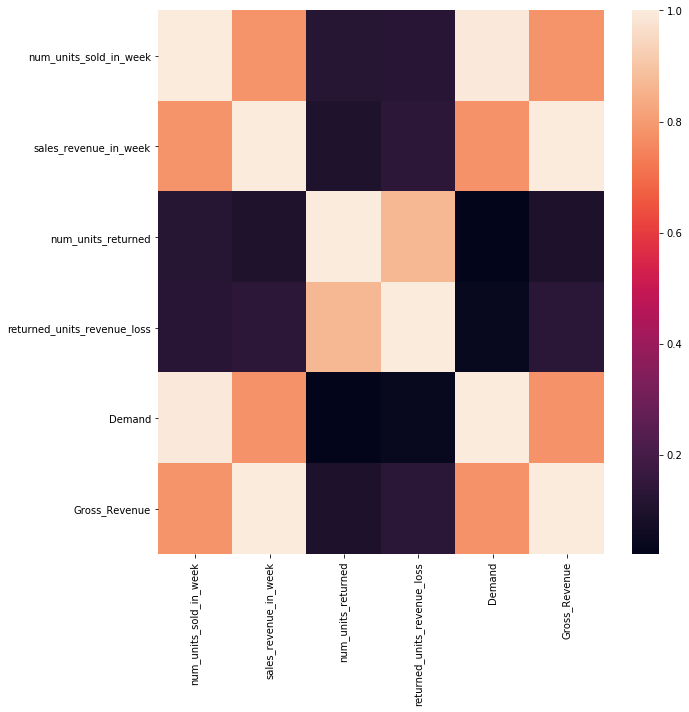

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Getting the heat Map of Correlation
plt.figure(figsize=(10,10))
sns.heatmap(trainnew.corr())
plt.show()


### Channel wise Sum of Sales 

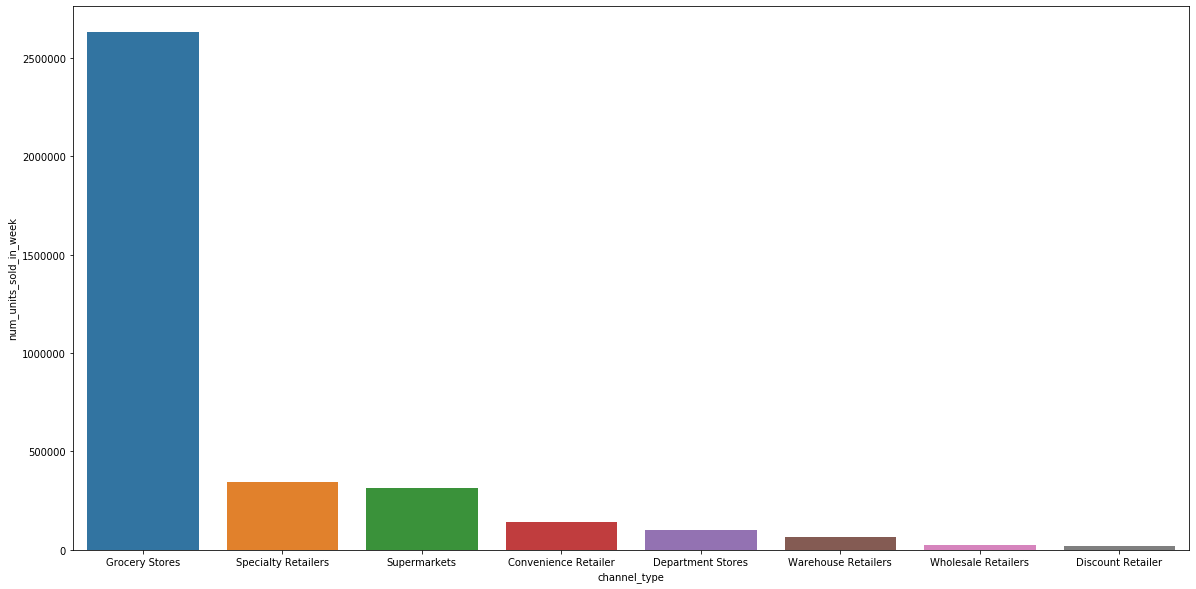

In [11]:
d1=trainnew.groupby(['channel_type'])['num_units_sold_in_week'].sum().reset_index()
d1=d1.sort_values("num_units_sold_in_week",ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x="channel_type",y="num_units_sold_in_week",data=d1)
plt.show()

##### Grocery Stores seem to have the most sales

### Weekwise Number of Units Sold

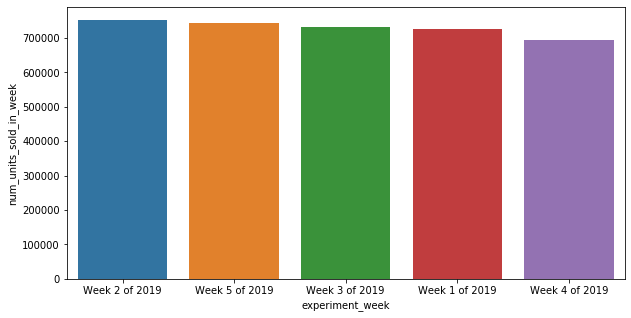

In [12]:
d1=trainnew.groupby(['experiment_week'])['num_units_sold_in_week'].sum().reset_index()
d1=d1.sort_values("num_units_sold_in_week",ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x="experiment_week",y="num_units_sold_in_week",data=d1)
plt.show()

### Week wise Number of Units Returned

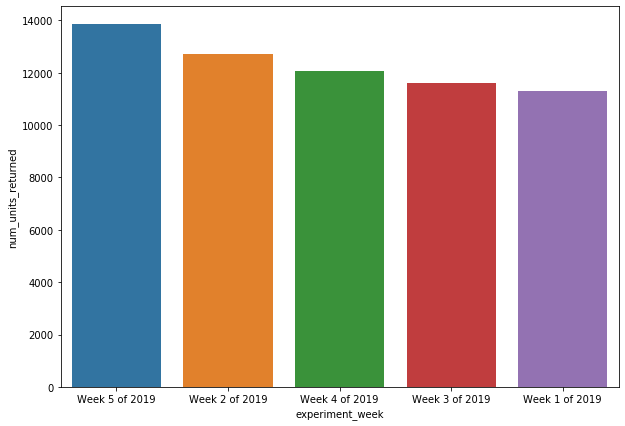

In [13]:
d1=trainnew.groupby(['experiment_week'])['num_units_returned'].sum().reset_index()
d1=d1.sort_values("num_units_returned",ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x="experiment_week",y="num_units_returned",data=d1)
plt.show()

##### we can see from the above that the number of units returned are increasing day by day, it might be because the perishable goods are being returned proceeding weeks. We might be able to capture this pattern 

### Week wise Sales 

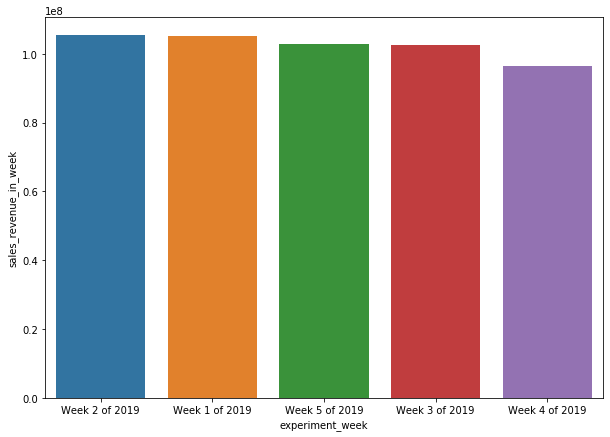

In [14]:
d1=trainnew.groupby(['experiment_week'])['sales_revenue_in_week'].sum().reset_index()
d1=d1.sort_values("sales_revenue_in_week",ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x="experiment_week",y="sales_revenue_in_week",data=d1)
plt.show()

##### Except for week 4 most of the weeks sales are similar, we can probably use this as one of the features(as in the average sales per week for item)

### Week wise Loss 

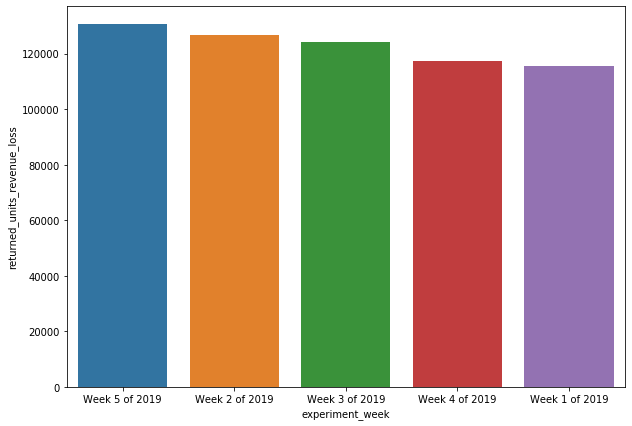

In [15]:
d1=trainnew.groupby(['experiment_week'])['returned_units_revenue_loss'].sum().reset_index()
d1=d1.sort_values("returned_units_revenue_loss",ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x="experiment_week",y="returned_units_revenue_loss",data=d1)
plt.show()

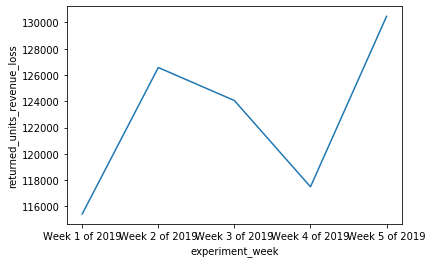

In [16]:
sns.lineplot(x="experiment_week",y="returned_units_revenue_loss",data=d1)

## Generating Demand and Gross Revenue 

In [17]:
#Here we are calculating Demand which is number of units sold in week - number of units returned, and we are also
#calculating gross revenue which I am keeping as sales revenue in week - returned units revenue loss.
trainnew["Demand"]=trainnew["num_units_sold_in_week"]-trainnew["num_units_returned"]
trainnew["Gross_Revenue"]=trainnew["sales_revenue_in_week"]-trainnew["returned_units_revenue_loss"]

### Week Wise Demand 

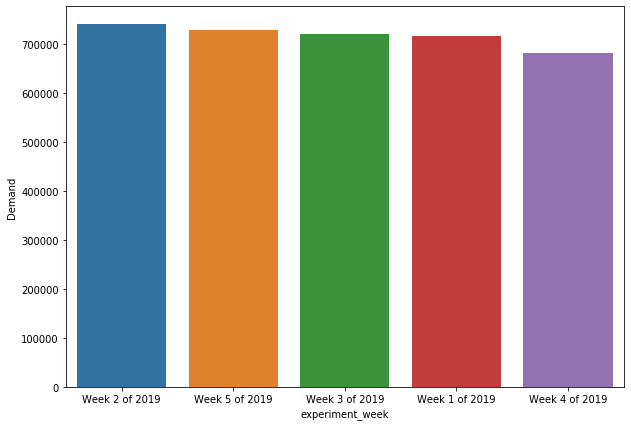

In [18]:
d1=trainnew.groupby(['experiment_week'])['Demand'].sum().reset_index()
d1=d1.sort_values("Demand",ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x="experiment_week",y="Demand",data=d1)
plt.show()

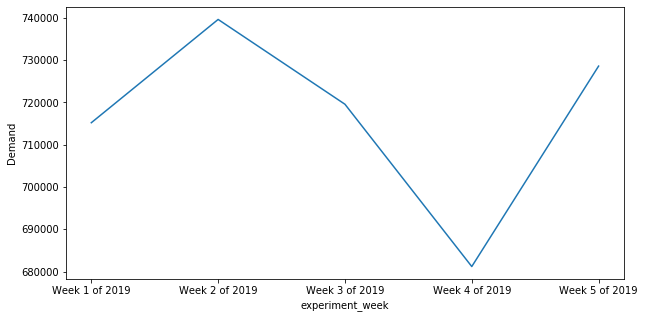

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(x="experiment_week",y="Demand",data=d1)
plt.show()

### Week Wise Gross Revenue 

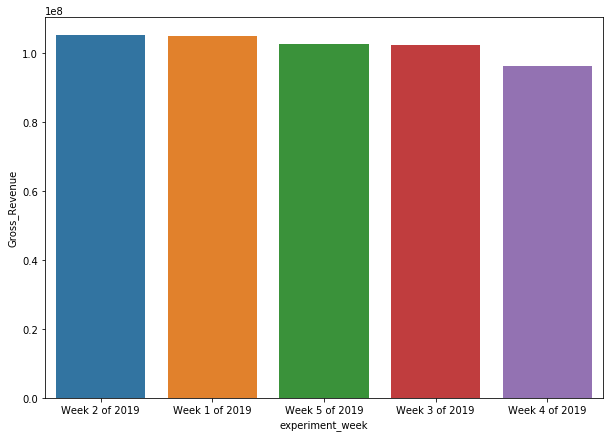

In [20]:
d1=trainnew.groupby(['experiment_week'])['Gross_Revenue'].sum().reset_index()
d1=d1.sort_values("Gross_Revenue",ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x="experiment_week",y="Gross_Revenue",data=d1)
plt.show()

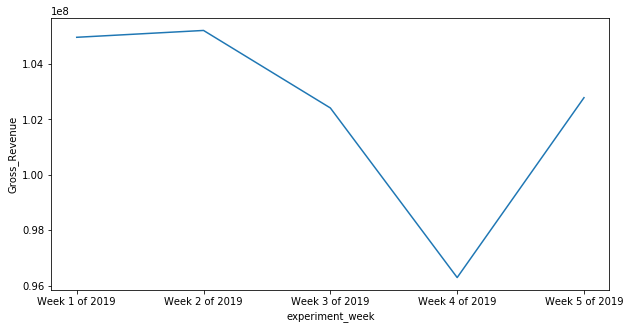

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(x="experiment_week",y="Gross_Revenue",data=d1)
plt.show()

In [240]:
0.1/1.06 #the variation in Gross Revenue is about 9.5% 

0.09433962264150944

##### Here we can see that except for week 4, there is not much difference in the Gross Revenue

## Feature Extraction

In [164]:
trainnew=train

In [172]:
#Here we are calculating Demand which is number of units sold in week - number of units returned, and we are also
#calculating gross revenue which I am keeping as sales revenue in week - returned units revenue loss.

trainnew["Demand"]=trainnew["num_units_sold_in_week"]-trainnew["num_units_returned"]
trainnew["Gross_Revenue"]=trainnew["sales_revenue_in_week"]-trainnew["returned_units_revenue_loss"]
trainnew.head()

,experiment_week,channel_type,num_units_sold_in_week,sales_revenue_in_week,num_units_returned,returned_units_revenue_loss,store_identifier,product_identifier,category_of_route,supplier_identifier,Demand,Gross_Revenue
0,Week 1 of 2019,Warehouse Retailers,3,377.1,0,0.0,store_fc6aa,product_cbfad,route_67047,supplier_identifier_055f7,3,377.1
1,Week 1 of 2019,Warehouse Retailers,4,502.8,0,0.0,store_fc6aa,product_2b363,route_67047,supplier_identifier_055f7,4,502.8
2,Week 1 of 2019,Warehouse Retailers,4,589.8,0,0.0,store_fc6aa,product_8de14,route_67047,supplier_identifier_055f7,4,589.8
3,Week 1 of 2019,Warehouse Retailers,4,502.8,0,0.0,store_fc6aa,product_1c00e,route_67047,supplier_identifier_055f7,4,502.8
4,Week 1 of 2019,Warehouse Retailers,3,343.8,0,0.0,store_fc6aa,product_55001,route_67047,supplier_identifier_055f7,3,343.8


In [25]:
traindata=trainnew[trainnew.experiment_week!='Week 5 of 2019']

In [26]:
traindata.shape

(42982034, 12)

In [27]:
traindata.columns

Index(['experiment_week', 'channel_type', 'num_units_sold_in_week',
       'sales_revenue_in_week', 'num_units_returned',
       'returned_units_revenue_loss', 'store_identifier', 'product_identifier',
       'category_of_route', 'supplier_identifier', 'Demand', 'Gross_Revenue'],
      dtype='object')

In [28]:
traindata.drop(['num_units_sold_in_week',
       'sales_revenue_in_week', 'num_units_returned',
       'returned_units_revenue_loss'],axis=1,inplace=True)

/Users/saketh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Supplier Identifier

Here we will segregate all the suppliers into clusters 

In [29]:
suppiden=traindata.groupby("supplier_identifier").sum()

In [30]:
suppiden.head()

,Demand,Gross_Revenue
supplier_identifier,,
supplier_identifier_00150,64031,8.940494e+06
supplier_identifier_00629,122968,1.593463e+07
supplier_identifier_023e3,1021438,1.247190e+08
supplier_identifier_0252f,579107,7.674058e+07
supplier_identifier_02eb0,970892,2.699721e+08


In [31]:
suppiden.columns=["1","2"]

In [32]:
suppiden.head()

,1,2
supplier_identifier,,
supplier_identifier_00150,64031,8.940494e+06
supplier_identifier_00629,122968,1.593463e+07
supplier_identifier_023e3,1021438,1.247190e+08
supplier_identifier_0252f,579107,7.674058e+07
supplier_identifier_02eb0,970892,2.699721e+08


In [33]:
#standardizing
from sklearn.preprocessing import StandardScaler
suppscalar=StandardScaler()
suppscalar.fit(suppiden)
suppidenstan=pd.DataFrame(suppscalar.transform(suppiden),columns=suppiden.columns,index=suppiden.index)

In [34]:
suppidenstan.head()

,1,2
supplier_identifier,,
supplier_identifier_00150,-0.951843,-0.976514
supplier_identifier_00629,-0.837885,-0.879890
supplier_identifier_023e3,0.899350,0.622972
supplier_identifier_0252f,0.044082,-0.039852
supplier_identifier_02eb0,0.801617,2.629653


In [35]:
#Scree Plot For Kmeans

from sklearn.cluster import KMeans

wss= {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(suppidenstan)
    #clusters = kmeans.labels_
    wss[k] = kmeans.inertia_ 
    # Inertia: Sum of squared distances of samples to their closest cluster center
wss

{1: 1104.0,
 2: 394.29679787958366,
 3: 216.37893560762524,
 4: 148.2421439270122,
 5: 100.8200218771295,
 6: 77.51149189705312,
 7: 63.4115155772169,
 8: 54.89770874884234,
 9: 46.02362726491692,
 10: 40.92678458463902,
 11: 35.55723101188502,
 12: 30.99169357184303,
 13: 27.714087319163973,
 14: 24.537416272172493}

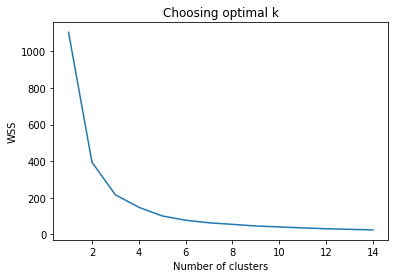

In [36]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.title("Elbow Curve")
plt.show()

In [37]:
kmeans_suppiden = KMeans(n_clusters=5)
kmeans_suppiden.fit(suppidenstan)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
suppidenstan["suppiden_cluster"]=kmeans_suppiden.predict(suppidenstan)
suppidenstan.head()

,1,2,suppiden_cluster
supplier_identifier,,,
supplier_identifier_00150,-0.951843,-0.976514,4
supplier_identifier_00629,-0.837885,-0.879890,4
supplier_identifier_023e3,0.899350,0.622972,2
supplier_identifier_0252f,0.044082,-0.039852,0
supplier_identifier_02eb0,0.801617,2.629653,1


In [39]:
#Merging this data with main table to get the clusters
traindata=pd.merge(traindata,suppidenstan,left_on="supplier_identifier",right_on="supplier_identifier")
traindata.drop(["1","2"],axis=1,inplace=True)
traindata.head()

,experiment_week,channel_type,store_identifier,product_identifier,category_of_route,supplier_identifier,Demand,Gross_Revenue,suppiden_cluster
0,Week 1 of 2019,Warehouse Retailers,store_fc6aa,product_cbfad,route_67047,supplier_identifier_055f7,3,377.1,0
1,Week 1 of 2019,Warehouse Retailers,store_fc6aa,product_2b363,route_67047,supplier_identifier_055f7,4,502.8,0
2,Week 1 of 2019,Warehouse Retailers,store_fc6aa,product_8de14,route_67047,supplier_identifier_055f7,4,589.8,0
3,Week 1 of 2019,Warehouse Retailers,store_fc6aa,product_1c00e,route_67047,supplier_identifier_055f7,4,502.8,0
4,Week 1 of 2019,Warehouse Retailers,store_fc6aa,product_55001,route_67047,supplier_identifier_055f7,3,343.8,0


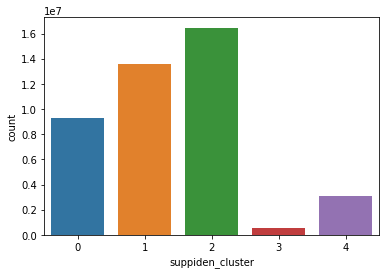

In [40]:
sns.countplot(traindata.suppiden_cluster)

## Category Of Route

Here we will segregate all the Categories of Routes into clusters 

In [41]:
cateofrt=traindata.groupby("category_of_route").sum()

In [42]:
cateofrt.head()

,Demand,Gross_Revenue,suppiden_cluster
category_of_route,,,
route_00037,182165,4.280561e+07,30028
route_0020a,88,1.434840e+04,0
route_002ab,96,2.662560e+04,12
route_00382,102970,1.216130e+07,17590
route_00431,208,3.944160e+04,16


In [43]:
cateofrt.drop("suppiden_cluster",axis=1,inplace=True)
cateofrt.head()

,Demand,Gross_Revenue
category_of_route,,
route_00037,182165,4.280561e+07
route_0020a,88,1.434840e+04
route_002ab,96,2.662560e+04
route_00382,102970,1.216130e+07
route_00431,208,3.944160e+04


In [44]:
cateofrt.shape

(3423, 2)

In [45]:
cateofrt.columns=["1","2"]

In [46]:
cateofrt.head()

,1,2
category_of_route,,
route_00037,182165,4.280561e+07
route_0020a,88,1.434840e+04
route_002ab,96,2.662560e+04
route_00382,102970,1.216130e+07
route_00431,208,3.944160e+04


In [47]:
#Standardizing
from sklearn.preprocessing import StandardScaler
corscalar=StandardScaler()
corscalar.fit(cateofrt)
cateofrtstan=pd.DataFrame(corscalar.transform(cateofrt),columns=cateofrt.columns,index=cateofrt.index)

In [48]:
cateofrtstan.head()

,1,2
category_of_route,,
route_00037,0.503330,1.121265
route_0020a,-0.487923,-0.479944
route_002ab,-0.487879,-0.479484
route_00382,0.072181,-0.025416
route_00431,-0.487270,-0.479005


In [49]:
#Scree Plot/Elbow Curve
from sklearn.cluster import KMeans

wss= {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(cateofrtstan)
    #clusters = kmeans.labels_
    wss[k] = kmeans.inertia_ 
    # Inertia: Sum of squared distances of samples to their closest cluster center
wss



{1: 6846.000000000001,
 2: 2292.511141807873,
 3: 1176.9317040535855,
 4: 777.0743527445459,
 5: 576.7134328333989,
 6: 455.47627953587437,
 7: 391.01562185549676,
 8: 341.74250839200266,
 9: 294.61348763972205,
 10: 250.46130697489554,
 11: 223.62619285622608,
 12: 194.40926805920043,
 13: 173.2198186327762,
 14: 154.04918872666727}

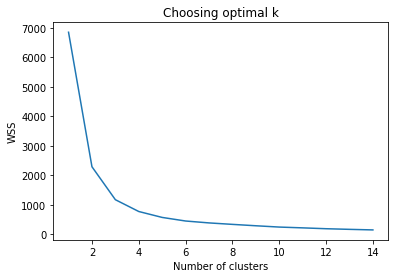

In [50]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.title("Elbow Curve")
plt.show()

In [51]:
kmeans_cateofrt = KMeans(n_clusters=7)
kmeans_cateofrt.fit(cateofrtstan)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
cateofrtstan["cateofrt_cluster"]=kmeans_cateofrt.predict(cateofrtstan)
cateofrtstan.head()

,1,2,cateofrt_cluster
category_of_route,,,
route_00037,0.503330,1.121265,5
route_0020a,-0.487923,-0.479944,0
route_002ab,-0.487879,-0.479484,0
route_00382,0.072181,-0.025416,3
route_00431,-0.487270,-0.479005,0


In [53]:
traindata=pd.merge(traindata,cateofrtstan,left_on="category_of_route",right_on="category_of_route")
traindata.drop(["1","2"],axis=1,inplace=True)
traindata.head()

,experiment_week,channel_type,store_identifier,product_identifier,category_of_route,supplier_identifier,Demand,Gross_Revenue,suppiden_cluster,cateofrt_cluster
0,Week 1 of 2019,Warehouse Retailers,store_fc6aa,product_cbfad,route_67047,supplier_identifier_055f7,3,377.1,0,6
1,Week 1 of 2019,Warehouse Retailers,store_fc6aa,product_2b363,route_67047,supplier_identifier_055f7,4,502.8,0,6
2,Week 1 of 2019,Warehouse Retailers,store_fc6aa,product_8de14,route_67047,supplier_identifier_055f7,4,589.8,0,6
3,Week 1 of 2019,Warehouse Retailers,store_fc6aa,product_1c00e,route_67047,supplier_identifier_055f7,4,502.8,0,6
4,Week 1 of 2019,Warehouse Retailers,store_fc6aa,product_55001,route_67047,supplier_identifier_055f7,3,343.8,0,6


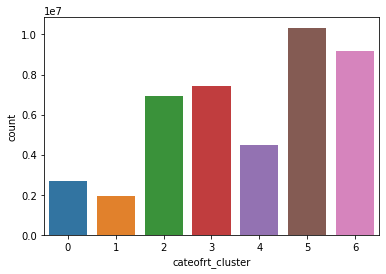

In [54]:
sns.countplot(traindata.cateofrt_cluster)

## Store Identifier

Here we will segregate the stores into clusters

In [55]:
storiden=traindata.groupby("store_identifier").sum()
storiden.head()

,Demand,Gross_Revenue,suppiden_cluster,cateofrt_cluster
store_identifier,,,,
store_00000,60,4198.36,0,65
store_00001,951,120315.47,172,499
store_00002,648,88434.84,8,289
store_00007,2492,292125.82,710,1197
store_00009,135,21216.77,59,236


In [56]:
storiden.drop(["suppiden_cluster","cateofrt_cluster"],axis=1,inplace=True)
storiden.head()

,Demand,Gross_Revenue
store_identifier,,
store_00000,60,4198.36
store_00001,951,120315.47
store_00002,648,88434.84
store_00007,2492,292125.82
store_00009,135,21216.77


In [57]:
storiden.columns=["1","2"]
storiden.head()

,1,2
store_identifier,,
store_00000,60,4198.36
store_00001,951,120315.47
store_00002,648,88434.84
store_00007,2492,292125.82
store_00009,135,21216.77


In [58]:
storiden.shape

(581707, 2)

In [59]:
#Standardizing
stidscalar=StandardScaler()
stidscalar.fit(storiden)
storidenstan=pd.DataFrame(stidscalar.transform(storiden),columns=storiden.columns,index=storiden.index)

In [60]:
storidenstan.head()

,1,2
store_identifier,,
store_00000,-0.035069,-0.040752
store_00001,0.031712,0.025559
store_00002,0.009002,0.007353
store_00007,0.147210,0.123677
store_00009,-0.029448,-0.031034


In [61]:
#Scree Plot
wss= {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(storidenstan)
    #clusters = kmeans.labels_
    wss[k] = kmeans.inertia_ 
    # Inertia: Sum of squared distances of samples to their closest cluster center
wss

{1: 1163414.0000000005,
 2: 27477.431756741968,
 3: 12983.648956911647,
 4: 9328.36233219374,
 5: 6854.773856734455,
 6: 4944.304709733093,
 7: 3683.6505424179013,
 8: 2897.4510459532285,
 9: 2267.6873867281265,
 10: 1841.519379212664,
 11: 1585.3876929582727,
 12: 1399.809757037472,
 13: 1247.0410106247732,
 14: 1135.228279684074}

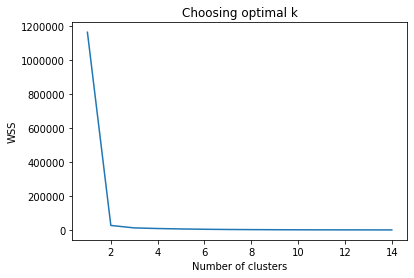

In [62]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.title("Elbow Curve")
plt.show()

In [63]:

kmeans_storiden = KMeans(n_clusters=9)
kmeans_storiden.fit(storidenstan)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
storidenstan["storiden_cluster"]=kmeans_storiden.predict(storidenstan)
storidenstan.head()

,1,2,storiden_cluster
store_identifier,,,
store_00000,-0.035069,-0.040752,0
store_00001,0.031712,0.025559,6
store_00002,0.009002,0.007353,0
store_00007,0.147210,0.123677,6
store_00009,-0.029448,-0.031034,0


In [65]:
storidenstan.storiden_cluster.value_counts()

0    489284
6     82345
3      7934
8      1469
5       563
2       104
7         6
4         1
1         1
Name: storiden_cluster, dtype: int64

In [66]:
traindata=pd.merge(traindata,storidenstan,left_on="store_identifier",right_on="store_identifier")
traindata.drop(["1","2"],axis=1,inplace=True)
traindata.head()

,experiment_week,channel_type,store_identifier,product_identifier,category_of_route,supplier_identifier,Demand,Gross_Revenue,suppiden_cluster,cateofrt_cluster,storiden_cluster
0,Week 1 of 2019,Warehouse Retailers,store_fc6aa,product_cbfad,route_67047,supplier_identifier_055f7,3,377.1,0,6,0
1,Week 1 of 2019,Warehouse Retailers,store_fc6aa,product_2b363,route_67047,supplier_identifier_055f7,4,502.8,0,6,0
2,Week 1 of 2019,Warehouse Retailers,store_fc6aa,product_8de14,route_67047,supplier_identifier_055f7,4,589.8,0,6,0
3,Week 1 of 2019,Warehouse Retailers,store_fc6aa,product_1c00e,route_67047,supplier_identifier_055f7,4,502.8,0,6,0
4,Week 1 of 2019,Warehouse Retailers,store_fc6aa,product_55001,route_67047,supplier_identifier_055f7,3,343.8,0,6,0


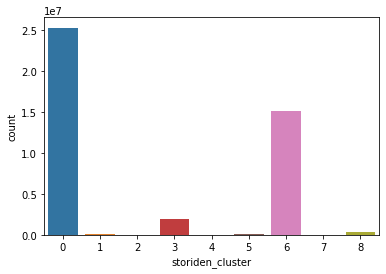

In [67]:
sns.countplot(traindata.storiden_cluster)

## Product Identifier

Here we will segregate all the Products into clusters 

In [68]:
prodiden=traindata.groupby("product_identifier").sum()

In [69]:
prodiden.head()

,Demand,Gross_Revenue,suppiden_cluster,cateofrt_cluster,storiden_cluster
product_identifier,,,,,
product_00037,28496,1.233364e+07,5225,8627,7675
product_00603,1,5.340000e+01,0,2,6
product_0087c,774525,1.991747e+08,497863,1409120,958297
product_00a5c,672,4.578336e+05,0,0,19
product_00a79,2474,6.136349e+05,300,432,768


In [70]:
prodiden.drop(["suppiden_cluster","cateofrt_cluster","storiden_cluster"],axis=1,inplace=True)

In [71]:
prodiden.head()

,Demand,Gross_Revenue
product_identifier,,
product_00037,28496,1.233364e+07
product_00603,1,5.340000e+01
product_0087c,774525,1.991747e+08
product_00a5c,672,4.578336e+05
product_00a79,2474,6.136349e+05


In [72]:
#Standardizing
pridscalar=StandardScaler()
pridscalar.fit(prodiden)
prodidenstan=pd.DataFrame(pridscalar.transform(prodiden),columns=prodiden.columns,index=prodiden.index)

In [73]:
prodidenstan.head()

,Demand,Gross_Revenue
product_identifier,,
product_00037,-0.189244,-0.137965
product_00603,-0.224787,-0.264381
product_0087c,0.741315,1.777098
product_00a5c,-0.223950,-0.259689
product_00a79,-0.221702,-0.258092


In [74]:
prodidenstan.columns=["1","2"]

In [75]:
prodidenstan.head()

,1,2
product_identifier,,
product_00037,-0.189244,-0.137965
product_00603,-0.224787,-0.264381
product_0087c,0.741315,1.777098
product_00a5c,-0.223950,-0.259689
product_00a79,-0.221702,-0.258092


In [76]:
#Scree Plot/Elbow Curve
wss= {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(prodidenstan)
    #clusters = kmeans.labels_
    wss[k] = kmeans.inertia_ 
    # Inertia: Sum of squared distances of samples to their closest cluster center
wss

{1: 3408.0000000000005,
 2: 1245.6112584664488,
 3: 734.4235052380823,
 4: 546.4343614269828,
 5: 402.66303820790387,
 6: 321.5975133099325,
 7: 274.1938571110481,
 8: 215.09752729075853,
 9: 174.11710807624758,
 10: 151.16549275311002,
 11: 125.16567672910406,
 12: 108.77162333417165,
 13: 93.95859412813076,
 14: 81.4589010565972}

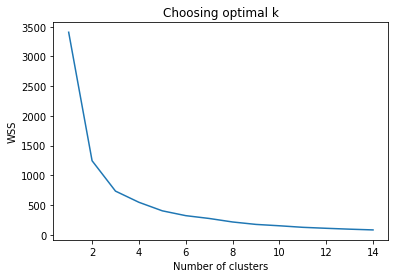

In [77]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.title("Elbow Curve")
plt.show()

In [78]:
kmeans_prodiden = KMeans(n_clusters=7)
kmeans_prodiden.fit(prodidenstan)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [79]:
prodidenstan["prodiden_cluster"]=kmeans_prodiden.predict(prodidenstan)
prodidenstan.head()

,1,2,prodiden_cluster
product_identifier,,,
product_00037,-0.189244,-0.137965,0
product_00603,-0.224787,-0.264381,0
product_0087c,0.741315,1.777098,3
product_00a5c,-0.223950,-0.259689,0
product_00a79,-0.221702,-0.258092,0


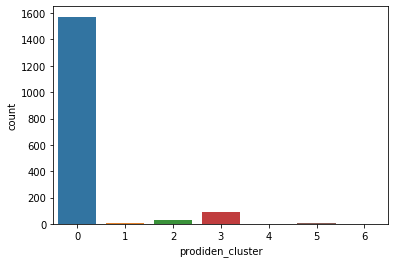

In [80]:
sns.countplot(prodidenstan.prodiden_cluster)

In [81]:
traindata=pd.merge(traindata,prodidenstan,left_on="product_identifier",right_on="product_identifier")
traindata.drop(["1","2"],axis=1,inplace=True)
traindata.head()

,experiment_week,channel_type,store_identifier,product_identifier,category_of_route,supplier_identifier,Demand,Gross_Revenue,suppiden_cluster,cateofrt_cluster,storiden_cluster,prodiden_cluster
0,Week 1 of 2019,Warehouse Retailers,store_fc6aa,product_cbfad,route_67047,supplier_identifier_055f7,3,377.1,0,6,0,2
1,Week 2 of 2019,Warehouse Retailers,store_fc6aa,product_cbfad,route_67047,supplier_identifier_055f7,4,502.8,0,6,0,2
2,Week 3 of 2019,Warehouse Retailers,store_fc6aa,product_cbfad,route_67047,supplier_identifier_055f7,5,628.5,0,6,0,2
3,Week 2 of 2019,Grocery Stores,store_d4cb0,product_cbfad,route_3b474,supplier_identifier_d818f,2,251.4,0,4,0,2
4,Week 3 of 2019,Grocery Stores,store_d4cb0,product_cbfad,route_3b474,supplier_identifier_d818f,1,125.7,0,4,0,2


## All of Features Extracted/Engineered:
### suppiden_cluster                 
### cateofrt_cluster                 
### storiden_cluster                 
### prodiden_cluster                 

## Model Building 

In [84]:
#Taking a Sample of 10,00,000 Data, since Model Building on all the data is very computationally Expensive
modeltrain=traindata.sample(n=1000000,random_state=23456)

In [85]:
modeltrain.head()

,experiment_week,channel_type,store_identifier,product_identifier,category_of_route,supplier_identifier,Demand,Gross_Revenue,suppiden_cluster,cateofrt_cluster,storiden_cluster,prodiden_cluster
9527216,Week 1 of 2019,Grocery Stores,store_175b8,product_f79b8,route_e81d4,supplier_identifier_fe91a,1,114.60,2,5,0,3
12809840,Week 4 of 2019,Grocery Stores,store_87f3a,product_5943e,route_56cc2,supplier_identifier_7e62c,10,1338.00,1,5,6,2
27435761,Week 4 of 2019,Grocery Stores,store_da126,product_e9ab3,route_9989a,supplier_identifier_f79b8,2,528.00,1,6,0,2
28888223,Week 3 of 2019,Grocery Stores,store_a6935,product_9f937,route_58557,supplier_identifier_8c244,1,160.35,2,2,0,3
31411775,Week 1 of 2019,Grocery Stores,store_61931,product_74361,route_b3252,supplier_identifier_77598,2,264.00,2,6,0,0


In [86]:
modeltrain.columns

Index(['experiment_week', 'channel_type', 'store_identifier',
       'product_identifier', 'category_of_route', 'supplier_identifier',
       'Demand', 'Gross_Revenue', 'suppiden_cluster', 'cateofrt_cluster',
       'storiden_cluster', 'prodiden_cluster'],
      dtype='object')

In [87]:
#Dropping the ID Columns
modeltrain.drop(['experiment_week', 'store_identifier', 'product_identifier','category_of_route', 'supplier_identifier'], axis=1,inplace=True)
modeltrain.head()




,channel_type,Demand,Gross_Revenue,suppiden_cluster,cateofrt_cluster,storiden_cluster,prodiden_cluster
9527216,Grocery Stores,1,114.60,2,5,0,3
12809840,Grocery Stores,10,1338.00,1,5,6,2
27435761,Grocery Stores,2,528.00,1,6,0,2
28888223,Grocery Stores,1,160.35,2,2,0,3
31411775,Grocery Stores,2,264.00,2,6,0,0


In [88]:
X_train=modeltrain.drop(["Demand","Gross_Revenue"],axis=1)

In [89]:
Y_train=modeltrain["Demand"]

In [90]:
X_train.shape

(1000000, 5)

In [91]:
Y_train.shape

(1000000,)

In [92]:
X_train.dtypes

channel_type        object
suppiden_cluster     int32
cateofrt_cluster     int32
storiden_cluster     int32
prodiden_cluster     int32
dtype: object

In [93]:
#Type Conversions
X_train.suppiden_cluster=X_train.suppiden_cluster.astype("category")
X_train.cateofrt_cluster=X_train.cateofrt_cluster.astype("category")
X_train.storiden_cluster=X_train.storiden_cluster.astype("category")
X_train.prodiden_cluster=X_train.prodiden_cluster.astype("category")
X_train.channel_type=X_train.channel_type.astype("category")

In [94]:
X_train.dtypes

channel_type        category
suppiden_cluster    category
cateofrt_cluster    category
storiden_cluster    category
prodiden_cluster    category
dtype: object

In [95]:
X_train.columns

Index(['channel_type', 'suppiden_cluster', 'cateofrt_cluster',
       'storiden_cluster', 'prodiden_cluster'],
      dtype='object')

In [96]:
X_train_cat=X_train[['suppiden_cluster', 'cateofrt_cluster', 'storiden_cluster','prodiden_cluster',"channel_type"]]


In [97]:
#Dummyfying
X_train_catdum=pd.get_dummies(X_train_cat)
X_train_catdum.shape

(1000000, 37)

In [99]:

X_train_processed=X_train_catdum
X_train_processed.head()

,suppiden_cluster_0,suppiden_cluster_1,suppiden_cluster_2,suppiden_cluster_3,suppiden_cluster_4,cateofrt_cluster_0,cateofrt_cluster_1,cateofrt_cluster_2,cateofrt_cluster_3,cateofrt_cluster_4,...,prodiden_cluster_6,channel_type_Convenience Retailer,channel_type_Department Stores,channel_type_Discount Retailer,channel_type_Grocery Stores,channel_type_Internet Retailers,channel_type_Specialty Retailers,channel_type_Supermarkets,channel_type_Warehouse Retailers,channel_type_Wholesale Retailers
9527216,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12809840,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
27435761,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
28888223,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
31411775,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [100]:
X_train_processed.dtypes

suppiden_cluster_0                   uint8
suppiden_cluster_1                   uint8
suppiden_cluster_2                   uint8
suppiden_cluster_3                   uint8
suppiden_cluster_4                   uint8
cateofrt_cluster_0                   uint8
cateofrt_cluster_1                   uint8
cateofrt_cluster_2                   uint8
cateofrt_cluster_3                   uint8
cateofrt_cluster_4                   uint8
cateofrt_cluster_5                   uint8
cateofrt_cluster_6                   uint8
storiden_cluster_0                   uint8
storiden_cluster_1                   uint8
storiden_cluster_2                   uint8
storiden_cluster_3                   uint8
storiden_cluster_4                   uint8
storiden_cluster_5                   uint8
storiden_cluster_6                   uint8
storiden_cluster_7                   uint8
storiden_cluster_8                   uint8
prodiden_cluster_0                   uint8
prodiden_cluster_1                   uint8
prodiden_cl

## Linear Regression

In [174]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train_dummified,(Y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [175]:
predictedtrain=regr.predict(X_train_dummified)

In [176]:
#Rounding OFF
predictedtrain=np.round(predictedtrain)

In [178]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#To #To compute mean absolute percentage error
MAPE=np.mean(abs((np.array(Y_train[Y_train.Demand_projection!=0])-np.array(predictedtrain[Y_train.Demand_projection!=0]))/np.array(Y_train[Y_train.Demand_projection!=0])))
print("MAPE: ",MAPE*100)

MAE=np.mean(abs((np.array(Y_train)-np.array(predictedtrain))))
print("MAE: ",MAE)

RMSE=np.sqrt(np.mean((np.array(Y_train)-np.array(predictedtrain))**2))
print("RMSE: ",RMSE)

print("MSE: %.2f" % mean_squared_error(Y_train, predictedtrain))

print('R^2: %.2f' % r2_score(Y_train, predictedtrain))

MAPE:  127.68985621669408
MAE:  5.217749
RMSE:  17.427120387488003
MSE: 303.70
R^2: 0.26


## Decision Tree

In [101]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()

DT.fit(X_train_processed, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [102]:
predictedtrain=DT.predict(X_train_processed)
predictedtrain

array([3.1602616 , 6.66771014, 3.60043603, ..., 3.66936749, 3.92500815,
       8.15463918])

In [103]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print("MSE: %.2f" % mean_squared_error(Y_train, predictedtrain))

print("RMSE: %.2f" %(mean_squared_error(Y_train, predictedtrain)**(1/2)))

print("MAE: %.2f" %mean_absolute_error(Y_train, predictedtrain))

print('R^2: %.2f' % r2_score(Y_train, predictedtrain))

MSE: 232.41
RMSE: 15.24
MAE: 4.82
R^2: 0.43


In [215]:
#GridSearch
from sklearn.model_selection import GridSearchCV

DT = DecisionTreeRegressor()
 
# Using a grid over parameters of interest
param_grid = {
     'max_depth': [7,9,11,13]
}

In [216]:
#Cross-Validating
CV_DT = GridSearchCV(estimator=DT, param_grid=param_grid, cv= 5)
CV_DT.fit(X=X_train_processed, y=Y_train)
predictedtrain = CV_DT.predict(X_train_processed)

In [217]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


print("MSE: %.2f" % mean_squared_error(Y_train, predictedtrain))

print("RMSE: %.2f" %(mean_squared_error(Y_train, predictedtrain)**(1/2)))

print("MAE: %.2f" %mean_absolute_error(Y_train, predictedtrain))

print('R^2: %.2f' % r2_score(Y_train, predictedtrain))

MSE: 265.44
RMSE: 16.29
MAE: 4.95
R^2: 0.35


In [218]:
CV_DT.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

## Random Forest 

In [241]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
clf = RandomForestClassifier(n_estimators=10,max_depth=9)
clf.fit(X=X_train_processed, y=Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [243]:
predictedtrain=clf.predict(X_train_processed)
predictedtrain=np.round(predictedtrain)


In [244]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#To #To compute mean absolute percentage error
"""MAPE=np.mean(abs((np.array(Y_train[Y_train.Demand_projection!=0])-np.array(predictedtrain[Y_train.Demand_projection!=0]))/np.array(Y_train[Y_train.Demand_projection!=0])))
print("MAPE: ",MAPE*100)"""

"""MAE=np.mean(abs((np.array(Y_train)-np.array(predictedtrain))))
print("MAE: ",MAE)

RMSE=np.sqrt(np.mean((np.array(Y_train)-np.array(predictedtrain))**2))
print("RMSE: ",RMSE)"""

print("MSE: %.2f" % mean_squared_error(Y_train, predictedtrain))

print("RMSE: %.2f" %(mean_squared_error(Y_train, predictedtrain)**(1/2)))

print("MAE: %.2f" %mean_absolute_error(Y_train, predictedtrain))

print('R^2: %.2f' % r2_score(Y_train, predictedtrain))

MSE: 376.94
RMSE: 19.41
MAE: 5.01
R^2: 0.08


### Tried the Random Forest Regressor but was crashing at predict in validation and test due to the large amount of test data 

## Validation Data

In [104]:
testdata=trainnew[trainnew.experiment_week=='Week 5 of 2019']
testdata.head()

,experiment_week,channel_type,num_units_sold_in_week,sales_revenue_in_week,num_units_returned,returned_units_revenue_loss,store_identifier,product_identifier,category_of_route,supplier_identifier,Demand,Gross_Revenue
42982034,Week 5 of 2019,Warehouse Retailers,2,251.4,0,0.0,store_fc6aa,product_2b363,route_67047,supplier_identifier_055f7,2,251.4
42982035,Week 5 of 2019,Warehouse Retailers,2,294.9,0,0.0,store_fc6aa,product_8de14,route_67047,supplier_identifier_055f7,2,294.9
42982036,Week 5 of 2019,Warehouse Retailers,8,1005.6,0,0.0,store_fc6aa,product_1c00e,route_67047,supplier_identifier_055f7,8,1005.6
42982037,Week 5 of 2019,Warehouse Retailers,2,229.2,0,0.0,store_fc6aa,product_55001,route_67047,supplier_identifier_055f7,2,229.2
42982038,Week 5 of 2019,Warehouse Retailers,14,1604.4,0,0.0,store_fc6aa,product_dfcaf,route_67047,supplier_identifier_055f7,14,1604.4


suppidenstan=traindata.groupby("supplier_identifier")["suppiden_cluster"].sum()
storidenstan=traindata.groupby("store_identifier")["storiden_cluster"].sum()
cateofrtstan=traindata.groupby("category_of_route")["cateofrt_cluster"].sum()
prodidenstan=traindata.groupby("product_identifier")["prodiden_cluster"].sum()

In [105]:
#merging the Test data with already available Clusters Data 
testdata=pd.merge(testdata,suppidenstan,left_on="supplier_identifier",right_on="supplier_identifier")
testdata.drop(["1","2"],axis=1,inplace=True)
testdata.head()

,experiment_week,channel_type,num_units_sold_in_week,sales_revenue_in_week,num_units_returned,returned_units_revenue_loss,store_identifier,product_identifier,category_of_route,supplier_identifier,Demand,Gross_Revenue,suppiden_cluster
0,Week 5 of 2019,Warehouse Retailers,2,251.4,0,0.0,store_fc6aa,product_2b363,route_67047,supplier_identifier_055f7,2,251.4,0
1,Week 5 of 2019,Warehouse Retailers,2,294.9,0,0.0,store_fc6aa,product_8de14,route_67047,supplier_identifier_055f7,2,294.9,0
2,Week 5 of 2019,Warehouse Retailers,8,1005.6,0,0.0,store_fc6aa,product_1c00e,route_67047,supplier_identifier_055f7,8,1005.6,0
3,Week 5 of 2019,Warehouse Retailers,2,229.2,0,0.0,store_fc6aa,product_55001,route_67047,supplier_identifier_055f7,2,229.2,0
4,Week 5 of 2019,Warehouse Retailers,14,1604.4,0,0.0,store_fc6aa,product_dfcaf,route_67047,supplier_identifier_055f7,14,1604.4,0


In [106]:
testdata.shape

(10382849, 13)

In [107]:
testdata=pd.merge(testdata,storidenstan,left_on="store_identifier",right_on="store_identifier",how="left")
testdata.drop(["1","2"],axis=1,inplace=True)
testdata=pd.merge(testdata,cateofrtstan,left_on="category_of_route",right_on="category_of_route",how="left")
testdata.drop(["1","2"],axis=1,inplace=True)
testdata=pd.merge(testdata,prodidenstan,left_on="product_identifier",right_on="product_identifier",how="left")
testdata.drop(["1","2"],axis=1,inplace=True)
testdata.head()

,experiment_week,channel_type,num_units_sold_in_week,sales_revenue_in_week,num_units_returned,returned_units_revenue_loss,store_identifier,product_identifier,category_of_route,supplier_identifier,Demand,Gross_Revenue,suppiden_cluster,storiden_cluster,cateofrt_cluster,prodiden_cluster
0,Week 5 of 2019,Warehouse Retailers,2,251.4,0,0.0,store_fc6aa,product_2b363,route_67047,supplier_identifier_055f7,2,251.4,0,0.0,6.0,2.0
1,Week 5 of 2019,Warehouse Retailers,2,294.9,0,0.0,store_fc6aa,product_8de14,route_67047,supplier_identifier_055f7,2,294.9,0,0.0,6.0,2.0
2,Week 5 of 2019,Warehouse Retailers,8,1005.6,0,0.0,store_fc6aa,product_1c00e,route_67047,supplier_identifier_055f7,8,1005.6,0,0.0,6.0,1.0
3,Week 5 of 2019,Warehouse Retailers,2,229.2,0,0.0,store_fc6aa,product_55001,route_67047,supplier_identifier_055f7,2,229.2,0,0.0,6.0,1.0
4,Week 5 of 2019,Warehouse Retailers,14,1604.4,0,0.0,store_fc6aa,product_dfcaf,route_67047,supplier_identifier_055f7,14,1604.4,0,0.0,6.0,1.0


In [108]:
testdata.tail()

,experiment_week,channel_type,num_units_sold_in_week,sales_revenue_in_week,num_units_returned,returned_units_revenue_loss,store_identifier,product_identifier,category_of_route,supplier_identifier,Demand,Gross_Revenue,suppiden_cluster,storiden_cluster,cateofrt_cluster,prodiden_cluster
10382844,Week 5 of 2019,Grocery Stores,2,382.5,0,0.0,store_d7372,product_48541,route_5078b,supplier_identifier_4ae6d,2,382.5,2,0.0,0.0,3.0
10382845,Week 5 of 2019,Grocery Stores,2,504.0,0,0.0,store_d7372,product_fa4c5,route_5078b,supplier_identifier_4ae6d,2,504.0,2,0.0,0.0,0.0
10382846,Week 5 of 2019,Grocery Stores,2,270.0,0,0.0,store_d7372,product_3fc7c,route_5078b,supplier_identifier_4ae6d,2,270.0,2,0.0,0.0,3.0
10382847,Week 5 of 2019,Grocery Stores,2,269.4,0,0.0,store_d7372,product_f7e0e,route_5078b,supplier_identifier_4ae6d,2,269.4,2,0.0,0.0,3.0
10382848,Week 5 of 2019,Grocery Stores,40,450.0,0,0.0,store_d7372,product_faf61,route_5078b,supplier_identifier_4ae6d,40,450.0,2,0.0,0.0,6.0


In [109]:
testdata.shape

(10382849, 16)

In [110]:
testdata.isnull().sum()

experiment_week                    0
channel_type                       0
num_units_sold_in_week             0
sales_revenue_in_week              0
num_units_returned                 0
returned_units_revenue_loss        0
store_identifier                   0
product_identifier                 0
category_of_route                  0
supplier_identifier                0
Demand                             0
Gross_Revenue                      0
suppiden_cluster                   0
storiden_cluster               24029
cateofrt_cluster                 156
prodiden_cluster               89501
dtype: int64

In [111]:
#Assigning all the NULL Values to a new value so that we can drop that later on 
testdata.loc[testdata.cateofrt_cluster.isnull(),"cateofrt_cluster"]=-1
testdata.loc[testdata.storiden_cluster.isnull(),"storiden_cluster"]=-1
testdata.loc[testdata.prodiden_cluster.isnull(),"prodiden_cluster"]=-1

In [112]:
testdata.isnull().sum()

experiment_week                0
channel_type                   0
num_units_sold_in_week         0
sales_revenue_in_week          0
num_units_returned             0
returned_units_revenue_loss    0
store_identifier               0
product_identifier             0
category_of_route              0
supplier_identifier            0
Demand                         0
Gross_Revenue                  0
suppiden_cluster               0
storiden_cluster               0
cateofrt_cluster               0
prodiden_cluster               0
dtype: int64

In [113]:
testdata.shape

(10382849, 16)

In [114]:
#Dropping columns not required
testdata.drop(['experiment_week', 'num_units_sold_in_week','sales_revenue_in_week', 'num_units_returned','returned_units_revenue_loss', 'store_identifier', 'product_identifier','category_of_route', 'supplier_identifier'], axis=1,inplace=True)

In [115]:
#Splitting, Type Conversions and Dummyfication
X_test=testdata.drop(["Demand","Gross_Revenue"],axis=1)
Y_test=testdata["Demand"]
X_test.suppiden_cluster=X_test.suppiden_cluster.astype("category")
X_test.cateofrt_cluster=X_test.cateofrt_cluster.astype("category")
X_test.storiden_cluster=X_test.storiden_cluster.astype("category")
X_test.prodiden_cluster=X_test.prodiden_cluster.astype("category")
X_test_cat=X_test[['suppiden_cluster', 'cateofrt_cluster', 'storiden_cluster','prodiden_cluster',"channel_type"]]
X_test_catdum=pd.get_dummies(X_test_cat)
X_test_processed=X_test_catdum

In [116]:
X_test_processed.dtypes

suppiden_cluster_0                   uint8
suppiden_cluster_1                   uint8
suppiden_cluster_2                   uint8
suppiden_cluster_3                   uint8
suppiden_cluster_4                   uint8
cateofrt_cluster_-1.0                uint8
cateofrt_cluster_0.0                 uint8
cateofrt_cluster_1.0                 uint8
cateofrt_cluster_2.0                 uint8
cateofrt_cluster_3.0                 uint8
cateofrt_cluster_4.0                 uint8
cateofrt_cluster_5.0                 uint8
cateofrt_cluster_6.0                 uint8
storiden_cluster_-1.0                uint8
storiden_cluster_0.0                 uint8
storiden_cluster_1.0                 uint8
storiden_cluster_2.0                 uint8
storiden_cluster_3.0                 uint8
storiden_cluster_4.0                 uint8
storiden_cluster_5.0                 uint8
storiden_cluster_6.0                 uint8
storiden_cluster_7.0                 uint8
storiden_cluster_8.0                 uint8
prodiden_cl

In [117]:
#Dropping the new columns that we assigned
X_test_processed.drop(["cateofrt_cluster_-1.0","storiden_cluster_-1.0","prodiden_cluster_-1.0"],axis=1,inplace=True)

In [219]:
#Predications
predictedtest=CV_DT.predict(X_test_processed)
predictedtest

array([11.01162003, 11.01162003, 11.01162003, ...,  3.29720587,
        3.29720587, 42.45555556])

In [220]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print("MSE: %.2f" % mean_squared_error(Y_test, predictedtest))

print("RMSE: %.2f" %(mean_squared_error(Y_test, predictedtest)**(1/2)))

print("MAE: %.2f" %mean_absolute_error(Y_test, predictedtest))

print('R^2: %.2f' % r2_score(Y_test, predictedtest))

MSE: 347.97
RMSE: 18.65
MAE: 5.24
R^2: 0.28


## Revenue Loss If Model is Deployed 

In [281]:
testdata=trainnew[trainnew.experiment_week=='Week 5 of 2019']

In [282]:
testdata.head()

,experiment_week,channel_type,num_units_sold_in_week,sales_revenue_in_week,num_units_returned,returned_units_revenue_loss,store_identifier,product_identifier,category_of_route,supplier_identifier,Demand,Gross_Revenue
42982034,Week 5 of 2019,Warehouse Retailers,2,251.4,0,0.0,store_fc6aa,product_2b363,route_67047,supplier_identifier_055f7,2,251.4
42982035,Week 5 of 2019,Warehouse Retailers,2,294.9,0,0.0,store_fc6aa,product_8de14,route_67047,supplier_identifier_055f7,2,294.9
42982036,Week 5 of 2019,Warehouse Retailers,8,1005.6,0,0.0,store_fc6aa,product_1c00e,route_67047,supplier_identifier_055f7,8,1005.6
42982037,Week 5 of 2019,Warehouse Retailers,2,229.2,0,0.0,store_fc6aa,product_55001,route_67047,supplier_identifier_055f7,2,229.2
42982038,Week 5 of 2019,Warehouse Retailers,14,1604.4,0,0.0,store_fc6aa,product_dfcaf,route_67047,supplier_identifier_055f7,14,1604.4


In [283]:
testdata.shape

(10382849, 12)

In [284]:
testdata["Unit_price"]=(testdata["sales_revenue_in_week"]/(testdata["num_units_sold_in_week"]))

testdata.head()

/Users/saketh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,experiment_week,channel_type,num_units_sold_in_week,sales_revenue_in_week,num_units_returned,returned_units_revenue_loss,store_identifier,product_identifier,category_of_route,supplier_identifier,Demand,Gross_Revenue,Unit_price
42982034,Week 5 of 2019,Warehouse Retailers,2,251.4,0,0.0,store_fc6aa,product_2b363,route_67047,supplier_identifier_055f7,2,251.4,125.70
42982035,Week 5 of 2019,Warehouse Retailers,2,294.9,0,0.0,store_fc6aa,product_8de14,route_67047,supplier_identifier_055f7,2,294.9,147.45
42982036,Week 5 of 2019,Warehouse Retailers,8,1005.6,0,0.0,store_fc6aa,product_1c00e,route_67047,supplier_identifier_055f7,8,1005.6,125.70
42982037,Week 5 of 2019,Warehouse Retailers,2,229.2,0,0.0,store_fc6aa,product_55001,route_67047,supplier_identifier_055f7,2,229.2,114.60
42982038,Week 5 of 2019,Warehouse Retailers,14,1604.4,0,0.0,store_fc6aa,product_dfcaf,route_67047,supplier_identifier_055f7,14,1604.4,114.60


In [285]:
testdata.loc[testdata.Unit_price.isnull(),"Unit_price"]=(testdata.loc[testdata.Unit_price.isnull(),"returned_units_revenue_loss"]/(testdata.loc[testdata.Unit_price.isnull(),"num_units_returned"]))


/Users/saketh/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [286]:
testdata.isnull().sum()

experiment_week                0
channel_type                   0
num_units_sold_in_week         0
sales_revenue_in_week          0
num_units_returned             0
returned_units_revenue_loss    0
store_identifier               0
product_identifier             0
category_of_route              0
supplier_identifier            0
Demand                         0
Gross_Revenue                  0
Unit_price                     0
dtype: int64

In [287]:
testdata["Predicted_Demand"]=predictedtest

/Users/saketh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [288]:
testdata["Error_prediction"]=(predictedtest-testdata["Demand"])
testdata.head()

/Users/saketh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,experiment_week,channel_type,num_units_sold_in_week,sales_revenue_in_week,num_units_returned,returned_units_revenue_loss,store_identifier,product_identifier,category_of_route,supplier_identifier,Demand,Gross_Revenue,Unit_price,Predicted_Demand,Error_prediction
42982034,Week 5 of 2019,Warehouse Retailers,2,251.4,0,0.0,store_fc6aa,product_2b363,route_67047,supplier_identifier_055f7,2,251.4,125.70,11.01162,9.01162
42982035,Week 5 of 2019,Warehouse Retailers,2,294.9,0,0.0,store_fc6aa,product_8de14,route_67047,supplier_identifier_055f7,2,294.9,147.45,11.01162,9.01162
42982036,Week 5 of 2019,Warehouse Retailers,8,1005.6,0,0.0,store_fc6aa,product_1c00e,route_67047,supplier_identifier_055f7,8,1005.6,125.70,11.01162,3.01162
42982037,Week 5 of 2019,Warehouse Retailers,2,229.2,0,0.0,store_fc6aa,product_55001,route_67047,supplier_identifier_055f7,2,229.2,114.60,11.01162,9.01162
42982038,Week 5 of 2019,Warehouse Retailers,14,1604.4,0,0.0,store_fc6aa,product_dfcaf,route_67047,supplier_identifier_055f7,14,1604.4,114.60,11.01162,-2.98838


In [289]:
testdata["Absolute_Error_Prediction"]=np.abs(testdata["Demand"]-predictedtest)
testdata.head()

/Users/saketh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,experiment_week,channel_type,num_units_sold_in_week,sales_revenue_in_week,num_units_returned,returned_units_revenue_loss,store_identifier,product_identifier,category_of_route,supplier_identifier,Demand,Gross_Revenue,Unit_price,Predicted_Demand,Error_prediction,Absolute_Error_Prediction
42982034,Week 5 of 2019,Warehouse Retailers,2,251.4,0,0.0,store_fc6aa,product_2b363,route_67047,supplier_identifier_055f7,2,251.4,125.70,11.01162,9.01162,9.01162
42982035,Week 5 of 2019,Warehouse Retailers,2,294.9,0,0.0,store_fc6aa,product_8de14,route_67047,supplier_identifier_055f7,2,294.9,147.45,11.01162,9.01162,9.01162
42982036,Week 5 of 2019,Warehouse Retailers,8,1005.6,0,0.0,store_fc6aa,product_1c00e,route_67047,supplier_identifier_055f7,8,1005.6,125.70,11.01162,3.01162,3.01162
42982037,Week 5 of 2019,Warehouse Retailers,2,229.2,0,0.0,store_fc6aa,product_55001,route_67047,supplier_identifier_055f7,2,229.2,114.60,11.01162,9.01162,9.01162
42982038,Week 5 of 2019,Warehouse Retailers,14,1604.4,0,0.0,store_fc6aa,product_dfcaf,route_67047,supplier_identifier_055f7,14,1604.4,114.60,11.01162,-2.98838,2.98838


In [290]:
testdata["Revenue_Loss"]=testdata["Error_prediction"]*testdata["Unit_price"]
testdata.head()

/Users/saketh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,experiment_week,channel_type,num_units_sold_in_week,sales_revenue_in_week,num_units_returned,returned_units_revenue_loss,store_identifier,product_identifier,category_of_route,supplier_identifier,Demand,Gross_Revenue,Unit_price,Predicted_Demand,Error_prediction,Absolute_Error_Prediction,Revenue_Loss
42982034,Week 5 of 2019,Warehouse Retailers,2,251.4,0,0.0,store_fc6aa,product_2b363,route_67047,supplier_identifier_055f7,2,251.4,125.70,11.01162,9.01162,9.01162,1132.760638
42982035,Week 5 of 2019,Warehouse Retailers,2,294.9,0,0.0,store_fc6aa,product_8de14,route_67047,supplier_identifier_055f7,2,294.9,147.45,11.01162,9.01162,9.01162,1328.763374
42982036,Week 5 of 2019,Warehouse Retailers,8,1005.6,0,0.0,store_fc6aa,product_1c00e,route_67047,supplier_identifier_055f7,8,1005.6,125.70,11.01162,3.01162,3.01162,378.560638
42982037,Week 5 of 2019,Warehouse Retailers,2,229.2,0,0.0,store_fc6aa,product_55001,route_67047,supplier_identifier_055f7,2,229.2,114.60,11.01162,9.01162,9.01162,1032.731656
42982038,Week 5 of 2019,Warehouse Retailers,14,1604.4,0,0.0,store_fc6aa,product_dfcaf,route_67047,supplier_identifier_055f7,14,1604.4,114.60,11.01162,-2.98838,2.98838,-342.468344


In [291]:
testdata["Potential_Revenue_Loss"]=testdata["Absolute_Error_Prediction"]*testdata["Unit_price"]

/Users/saketh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Here there is negetive Revenue Loss which means that the prediction made was less than the actual demand, although this does not cause any actual Operational Loss. This would have caused Potential Loss(The Sales that could have been captured)

In [292]:
testdata.loc[testdata.Revenue_Loss<0,"Revenue_Loss"]=0

In [293]:
testdata.describe()

,num_units_sold_in_week,sales_revenue_in_week,num_units_returned,returned_units_revenue_loss,Demand,Gross_Revenue,Unit_price,Predicted_Demand,Error_prediction,Absolute_Error_Prediction,Revenue_Loss,Potential_Revenue_Loss
count,1.038285e+07,1.038285e+07,1.038285e+07,1.038285e+07,1.038285e+07,1.038285e+07,1.038285e+07,1.038285e+07,1.038285e+07,1.038285e+07,1.038285e+07,1.038285e+07
mean,7.468859e+00,1.042579e+03,1.365184e-01,1.318890e+00,7.332341e+00,1.041260e+03,1.510941e+02,7.198844e+00,-1.334966e-01,5.239718e+00,4.205535e+02,7.878955e+02
std,2.195329e+01,5.063838e+03,2.897295e+00,2.479935e+01,2.194799e+01,5.061882e+03,9.070333e+01,1.217118e+01,1.865340e+01,1.790286e+01,1.489591e+03,4.016567e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.800000e+03,-2.661120e+04,1.500000e-01,-3.933333e+01,-4.959553e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2.514000e+02,0.000000e+00,0.000000e+00,2.000000e+00,2.514000e+02,1.014000e+02,3.297206e+00,-1.043928e+00,1.297206e+00,0.000000e+00,1.566204e+02
50%,3.000000e+00,4.500000e+02,0.000000e+00,0.000000e+00,3.000000e+00,4.500000e+02,1.257000e+02,4.759915e+00,1.297206e+00,2.498685e+00,1.686020e+02,3.374289e+02
75%,7.000000e+00,8.557500e+02,0.000000e+00,0.000000e+00,7.000000e+00,8.556000e+02,1.986000e+02,6.498685e+00,2.759915e+00,4.813142e+00,4.425524e+02,6.787580e+02
max,4.983000e+03,5.740416e+06,2.800000e+03,2.661120e+04,4.983000e+03,5.740416e+06,9.710400e+03,1.907000e+03,2.823447e+03,4.959553e+03,6.774326e+05,5.411538e+06


In [294]:
testdata.isnull().sum()

experiment_week                0
channel_type                   0
num_units_sold_in_week         0
sales_revenue_in_week          0
num_units_returned             0
returned_units_revenue_loss    0
store_identifier               0
product_identifier             0
category_of_route              0
supplier_identifier            0
Demand                         0
Gross_Revenue                  0
Unit_price                     0
Predicted_Demand               0
Error_prediction               0
Absolute_Error_Prediction      0
Revenue_Loss                   0
Potential_Revenue_Loss         0
dtype: int64

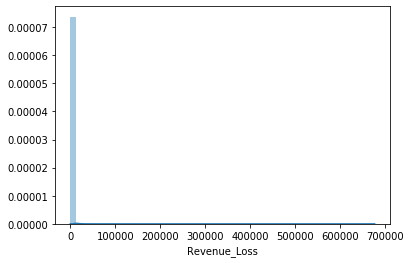

In [295]:
sns.distplot(testdata.Revenue_Loss)

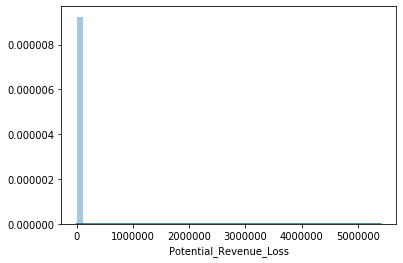

In [296]:
sns.distplot(testdata.Potential_Revenue_Loss)

In [297]:
#Total Revenue Loss/ Operational Loss for the company
testdata.Revenue_Loss.sum()

4366543218.466204

In [298]:
#Total Potential Loss for the company, Demand trends that have not been captured
testdata.Potential_Revenue_Loss.sum()

8180599703.072537

## The above Model would cause about 436 Crores of Revenue Loss 

## Test Data

In [131]:
#Reading the Test Data
testdata=pd.read_csv("test.csv")
testdata.head()


,id,experiment_week,channel_type,supplier_identifier,category_of_route,store_identifier,product_identifier
0,1,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_cbfad
1,2,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_2b363
2,3,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_f79b8
3,4,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_8de14
4,5,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_1c00e


In [132]:
testdata.head()

,id,experiment_week,channel_type,supplier_identifier,category_of_route,store_identifier,product_identifier
0,1,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_cbfad
1,2,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_2b363
2,3,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_f79b8
3,4,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_8de14
4,5,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_1c00e


In [133]:
#merging the Test data with already available Clusters Data 
testdata=pd.merge(testdata,suppidenstan,left_on="supplier_identifier",right_on="supplier_identifier",how="left")
testdata.drop(["1","2"],axis=1,inplace=True)
testdata=pd.merge(testdata,cateofrtstan,left_on="category_of_route",right_on="category_of_route",how="left")
testdata.drop(["1","2"],axis=1,inplace=True)
testdata=pd.merge(testdata,storidenstan,left_on="store_identifier",right_on="store_identifier",how="left")
testdata.drop(["1","2"],axis=1,inplace=True)
testdata=pd.merge(testdata,prodidenstan,left_on="product_identifier",right_on="product_identifier",how="left")
testdata.drop(["1","2"],axis=1,inplace=True)
testdata.head()

,id,experiment_week,channel_type,supplier_identifier,category_of_route,store_identifier,product_identifier,suppiden_cluster,cateofrt_cluster,storiden_cluster,prodiden_cluster
0,1,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_cbfad,0,6.0,0.0,2.0
1,2,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_2b363,0,6.0,0.0,2.0
2,3,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_f79b8,0,6.0,0.0,3.0
3,4,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_8de14,0,6.0,0.0,2.0
4,5,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_1c00e,0,6.0,0.0,1.0


In [134]:
#checking For Null Values
testdata.isnull().sum()

id                          0
experiment_week             0
channel_type                0
supplier_identifier         0
category_of_route           0
store_identifier            0
product_identifier          0
suppiden_cluster            0
cateofrt_cluster         5501
storiden_cluster        84107
prodiden_cluster       392421
dtype: int64

In [135]:
# Assigning One to Cluster Values which have null values which we will later drop
testdata.loc[testdata.cateofrt_cluster.isnull(),"cateofrt_cluster"]=-1
testdata.loc[testdata.storiden_cluster.isnull(),"storiden_cluster"]=-1
testdata.loc[testdata.prodiden_cluster.isnull(),"prodiden_cluster"]=-1

In [136]:
testdata.isnull().sum()

id                     0
experiment_week        0
channel_type           0
supplier_identifier    0
category_of_route      0
store_identifier       0
product_identifier     0
suppiden_cluster       0
cateofrt_cluster       0
storiden_cluster       0
prodiden_cluster       0
dtype: int64

In [137]:
# Dropping "id","experiment_week",'supplier_identifier','category_of_route', 'store_identifier', 'product_identifier'



X_test=testdata.drop(["id","experiment_week",'supplier_identifier','category_of_route', 'store_identifier', 'product_identifier'], axis=1)

#Type Conversions
for i in X_test.columns:
    X_test[i]=X_test[i].astype("category")
X_test.dtypes

channel_type        category
suppiden_cluster    category
cateofrt_cluster    category
storiden_cluster    category
prodiden_cluster    category
dtype: object

In [138]:
#Dummyfication
X_test=pd.get_dummies(X_test)


#Dropping the new columns 
X_test.drop(["storiden_cluster_-1.0","cateofrt_cluster_-1.0","prodiden_cluster_-1.0"],axis=1,inplace=True)

In [139]:
#Predicting From the Test Data
predictedtest=CV_DT.predict(X_test)
predictedtest

array([ 36.        ,  36.        ,  38.62068966, ...,  80.        ,
       103.625     ,  10.        ])

In [140]:
#Rounding Off Predications to nearest value
np.round(predictedtest)

array([ 36.,  36.,  39., ...,  80., 104.,  10.])

In [143]:

final=pd.DataFrame(np.round(predictedtest))
final.head()

,0
0,36.0
1,36.0
2,39.0
3,36.0
4,7.0


In [144]:
final["id"]=testdata.id
final.head()

,0,id
0,36.0,1
1,36.0,2
2,39.0,3
3,36.0,4
4,7.0,5


In [145]:
final=final[["id",0]]
final.head()

,id,0
0,1,36.0
1,2,36.0
2,3,39.0
3,4,36.0
4,5,7.0


In [146]:
final.columns=["id","demand_projection"]
final.head()

,id,demand_projection
0,1,36.0
1,2,36.0
2,3,39.0
3,4,36.0
4,5,7.0


In [147]:
final.dtypes

id                     int64
demand_projection    float64
dtype: object

In [148]:
final.demand_projection=final.demand_projection.astype("int64")

In [149]:
final.demand_projection.max()

3350

In [150]:
final.shape

(20815581, 2)

In [151]:
#Exporting the Final DataFrame to CSV for Upload
final.to_csv("3223Saketh.csv",index=False)

 ## Final RMSE: 18.5 